In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('tips.csv', sep=',', quotechar='"', dtype={'time':'category'})

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Encontrar Fecuencia Absoluta, Relativa

Frecuencia Absoluta

In [6]:
#Informacion de la frecuencia absoluta como una serie de datos
x = df['tip'].value_counts().to_frame()

In [7]:
#suma total 
total_freq = x['tip'].sum()

In [8]:
total_freq

244

Frecuencia Relativa

In [9]:
#frecuencia relaita
def freq_relative(x):
    return x/total_freq

Caclculo de la media de tip

In [10]:
media = freq_relative(x).mean()

In [11]:
media

tip    0.00813
dtype: float64

In [14]:
media1 = df['tip'].mean()

In [15]:
media1

2.9982786885245902

Calculo del anngulo

In [14]:
#Calcular el angulo (Frecuencia Porcentual)
def angulo(x):
    return freq_relative(x)*360

In [15]:
angulo(x)

,tip
2.00,48.688525
3.00,33.934426
4.00,17.704918
5.00,14.754098
2.50,14.754098
...,...
2.83,1.475410
1.58,1.475410
3.71,1.475410
3.35,1.475410


Encontrar la relacion que existe entre propina y factura

In [16]:
solo_genero = df['sex']
solo_factura = df['total_bill']
solo_propina = df['tip']

In [17]:
matriz_genero = np.zeros((total_freq))
matriz_propina = np.zeros((total_freq))
matriz_factura = np.zeros((total_freq))

In [18]:
for i in range(total_freq):
    aux = 0
    if solo_genero[i] == "Male":
        aux = 1
        matriz_genero[i] = aux 
    elif solo_genero[i] == "Female":
        aux = 2
        matriz_genero[i] = aux
    matriz_propina[i] =  solo_factura[i]
    matriz_factura[i] = solo_propina[i]

In [19]:
FINAL = np.zeros((total_freq,3))

In [20]:
for i in range(total_freq):
    FINAL[i,0] = matriz_propina[i]
    FINAL[i,1] = matriz_factura[i]
    FINAL[i,2] = matriz_genero[i]

In [21]:
data_frame = pd.DataFrame(FINAL, columns = ['total_bill', 'tip','Sex'])

In [22]:
data_frame

,total_bill,tip,Sex
0,16.99,1.01,2.0
1,10.34,1.66,1.0
2,21.01,3.50,1.0
3,23.68,3.31,1.0
4,24.59,3.61,2.0
...,...,...,...
239,29.03,5.92,1.0
240,27.18,2.00,2.0
241,22.67,2.00,1.0
242,17.82,1.75,1.0


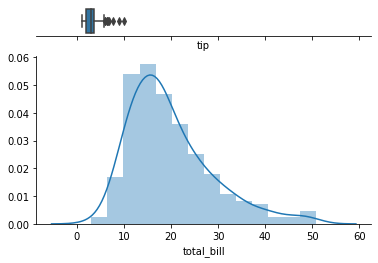

In [23]:
f, (ax_box, ax_hist)=plt.subplots(2, sharex = True,
                                 gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(df['tip'], ax=ax_box)
#para que grafique la campana de gaus
sns.distplot(df['total_bill'], ax=ax_hist)

ax_box.set(yticks=[])
#grafica la informacion en el mismo factura
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Encontrar la relacion que existe entre propina-factura-genero

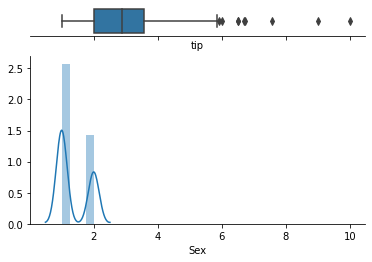

In [24]:
f, (ax_box, ax_hist)=plt.subplots(2, sharex = True,
                                 gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data_frame['tip'], ax=ax_box)
#para que grafique la campana de gaus
sns.distplot(data_frame['Sex'], ax=ax_hist)

ax_box.set(yticks=[])
#grafica la informacion en el mismo factura
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

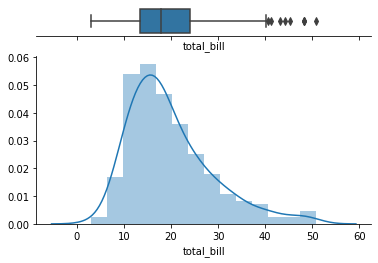

In [25]:
f, (ax_box, ax_hist)=plt.subplots(2, sharex = True,
                                 gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data_frame['total_bill'], ax=ax_box)
#para que grafique la campana de gaus
sns.distplot(data_frame['total_bill'], ax=ax_hist)

ax_box.set(yticks=[])
#grafica la informacion en el mismo factura
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)